## Projet d'Analyse Numérique



1) il s'agit d'une discrétisation du problème par différences finies


In [108]:
# les eternels imports
import numpy as np
import numpy.linalg as la
import scipy as sp
import scipy.linalg as spla
import matplotlib.pyplot as plt

Pour rappel, la fonction $R : \mathbb{R}^n \to \mathbb{R}^n$ est définie par

$$ (R(u))_i = \sum_{j \ne i, \ j=1}^{n} \left[ \frac{\sqrt{h}}{\sqrt{|i - j|}} (u_i^4 - u_j^4 ) \right] + \frac{\sqrt{h}}{2 \sqrt{i}}(u_i^4 - 1 ) + \frac{\sqrt{h}}{2 \sqrt{n + 1 - i}} (u_i^4 - 16) $$

In [129]:
n = 50
h = 1 / (n + 1)
h2 = h*h

def function_R(u):
    # input : u \in R^n
    R = []
    for i in range(n): 
        r_i = 0
        for j in range(n):
            if j != i:
                term = np.sqrt(h) * (u[i]**4 - u[j]**4) / np.sqrt(np.abs(i - j))
                r_i += term
        r_i += np.sqrt(h) * (u[i]**4 - 1) / (2 * np.sqrt(1 + i))
        r_i += np.sqrt(h) * (u[i]**4 - 16) / (2 * np.sqrt(n - i))
        R.append(r_i)
    #return np.zeros(n)
    return np.array(R, float)


A = np.zeros((n, n))
for j in range(n):
    for i in range(n):
        if j == i:
            A[i, j] = 2
        elif np.abs(j - i) == 1:
            A[i, j] = -1

A = A / (10 * h2)
print(A)

b = np.zeros(n)
b[0] = 1 / (10 * h2)
b[n-1] = 2 / (10 * h2)
print(b)

[[ 520.2 -260.1    0.  ...    0.     0.     0. ]
 [-260.1  520.2 -260.1 ...    0.     0.     0. ]
 [   0.  -260.1  520.2 ...    0.     0.     0. ]
 ...
 [   0.     0.     0.  ...  520.2 -260.1    0. ]
 [   0.     0.     0.  ... -260.1  520.2 -260.1]
 [   0.     0.     0.  ...    0.  -260.1  520.2]]
[260.1   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.  520.2]


In [130]:
def methode_iterative(A, b, beta, u0=np.ones(n)):
    max_iter = 1000
    iter = 0
    res = 1
    u = u0
    while iter < max_iter and res > 1e-7:
        # (A + beta I) uk+1 = -R(uk) + beta uk + b
        A_ = A + beta * np.identity(n)
        b_ = - function_R(u) + beta * u + b
        
        sol = la.solve(A_, b_)
        res = la.norm((u - sol))
        
        u = sol
        
        iter += 1
    return u, iter

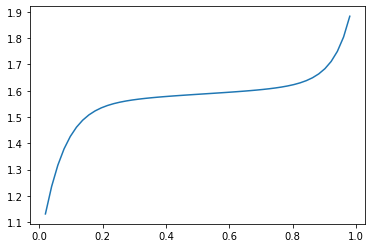

In [135]:
x = np.array([i*h for i in range(1, n+1)])
u, nb_iter = methode_iterative(A, b, 100)
plt.plot(x, u)